In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity= 'all'

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
%matplotlib inline

In [6]:
# file reading formats
# data = pd.read_csv("C:/Users/CR GAYATHRI/Desktop/MachineLearning/Amaresh/CrudeOilOutput.csv")
# data = pd.read_csv("C:\\Users\\CR GAYATHRI\\Desktop\\MachineLearning\\Amaresh\\CrudeOilOutput.csv")
data = pd.read_csv(r"C:\Users\CR GAYATHRI\Desktop\MachineLearning\Practice\CrudeOilOutput.csv")

In [7]:
data.head()

,WorldOil,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
0,55.7,74.3,13.4,83.5,598.6,21.7
1,55.7,72.5,13.6,114.0,610.0,20.7
2,52.8,70.5,14.0,172.5,654.6,19.2
3,57.3,74.4,13.8,191.1,684.9,19.1
4,59.7,76.3,14.1,250.9,697.2,19.2


In [8]:
data.columns

Index(['WorldOil', 'USEnergy', 'USAutoFuelRate', 'USNuclear', 'USCoal',
       'USDryGas'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 6 columns):
WorldOil          26 non-null float64
USEnergy          26 non-null float64
USAutoFuelRate    26 non-null float64
USNuclear         26 non-null float64
USCoal            26 non-null float64
USDryGas          26 non-null float64
dtypes: float64(6)
memory usage: 1.3 KB


In [10]:
data.cov()

,WorldOil,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
WorldOil,14.937062,21.9476,6.526692,501.455754,371.381938,1.116877
USEnergy,21.947600,37.8328,14.033600,1018.079600,749.598800,0.472800
USAutoFuelRate,6.526692,14.0336,8.326538,542.555631,430.252308,-1.644385
USNuclear,501.455754,1018.0796,542.555631,37410.547385,28368.995846,-105.363508
USCoal,371.381938,749.5988,430.252308,28368.995846,23730.313662,-93.112677
USDryGas,1.116877,0.4728,-1.644385,-105.363508,-93.112677,1.816446


In [11]:
data.corr()

,WorldOil,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
WorldOil,1.000000,0.923252,0.585232,0.670815,0.623787,0.214418
USEnergy,0.923252,1.000000,0.790683,0.855757,0.791121,0.057034
USAutoFuelRate,0.585232,0.790683,1.000000,0.972109,0.967919,-0.422824
USNuclear,0.670815,0.855757,0.972109,1.000000,0.952128,-0.404187
USCoal,0.623787,0.791121,0.967919,0.952128,1.000000,-0.448483
USDryGas,0.214418,0.057034,-0.422824,-0.404187,-0.448483,1.000000


In [12]:
sns.set_style(style='darkgrid')
plt.style.use('ggplot')

In [13]:
data.corr().style.background_gradient(cmap = 'Greens')

,WorldOil,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
WorldOil,1,0.923252,0.585232,0.670815,0.623787,0.214418
USEnergy,0.923252,1,0.790683,0.855757,0.791121,0.0570338
USAutoFuelRate,0.585232,0.790683,1,0.972109,0.967919,-0.422824
USNuclear,0.670815,0.855757,0.972109,1,0.952128,-0.404187
USCoal,0.623787,0.791121,0.967919,0.952128,1,-0.448483
USDryGas,0.214418,0.0570338,-0.422824,-0.404187,-0.448483,1


<Figure size 600x400 with 0 Axes>

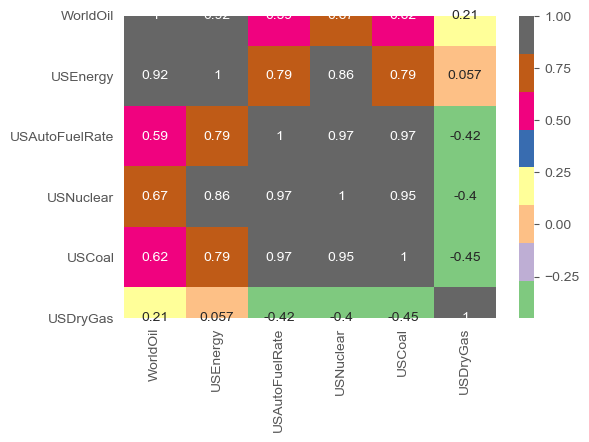

In [14]:
plt.figure(dpi = 100)

sns.heatmap(data.corr(), annot= True, cmap = 'Accent')

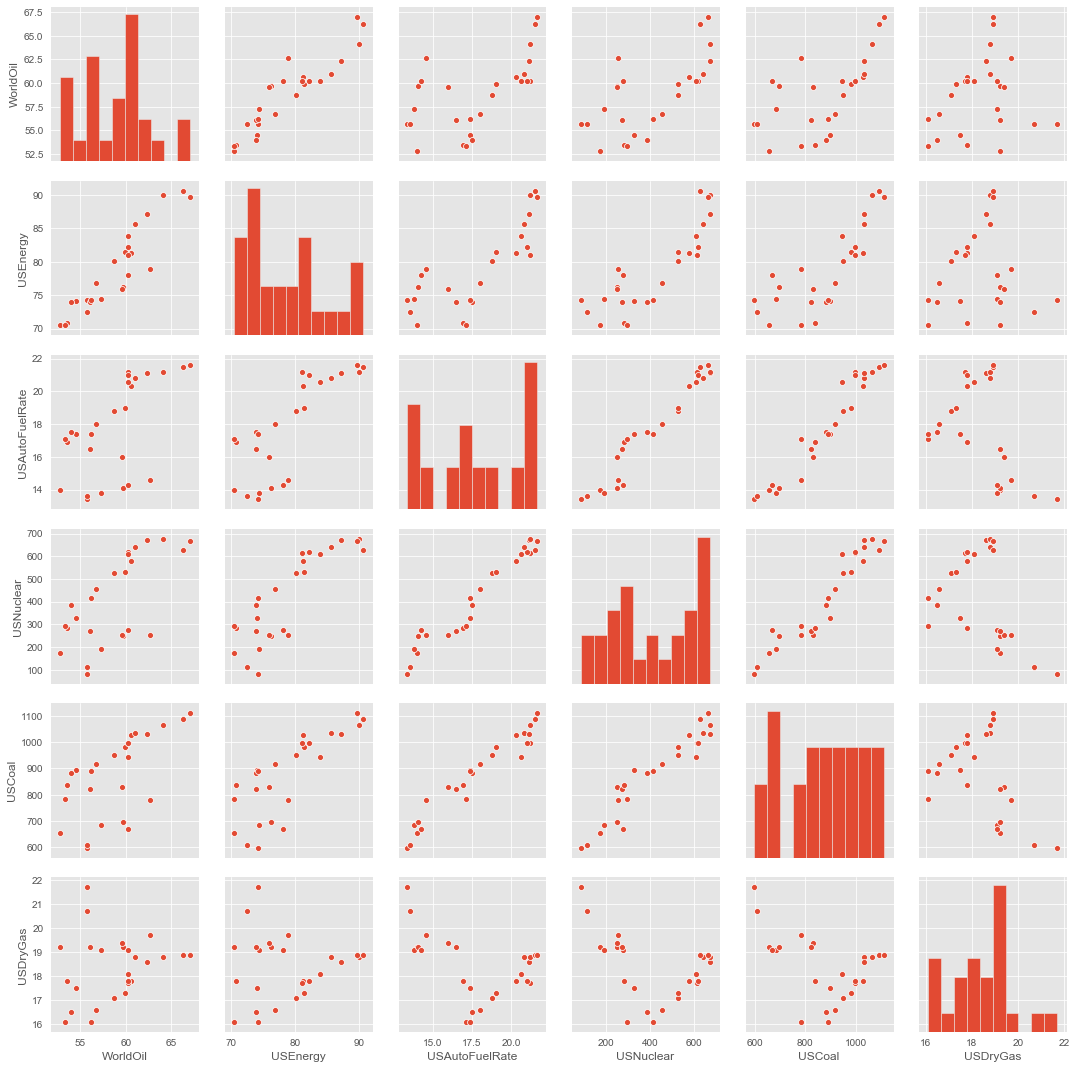

In [15]:
sns.pairplot(data)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
data.columns

Index(['WorldOil', 'USEnergy', 'USAutoFuelRate', 'USNuclear', 'USCoal',
       'USDryGas'],
      dtype='object')

In [18]:
X = data.drop('WorldOil', axis=1)
Y = data['WorldOil']

In [19]:
reg = LinearRegression()

In [20]:
regfit = reg.fit(X,Y)

In [21]:
regfit.coef_

array([ 0.83567046, -0.73414356, -0.00654432,  0.00982508, -0.14321095])

In [22]:
regfit.intercept_

2.7084739503587016

In [23]:
regfit.score(X,Y)

0.920974671551571

In [24]:
from sklearn import metrics

In [25]:
regpred = regfit.predict(X)

In [26]:
from sklearn.metrics import r2_score
r2_score(Y,regpred)

0.920974671551571

In [27]:
np.sqrt(metrics.mean_squared_error(Y,regpred))

1.0653665828697179

In [28]:
import statsmodels.formula.api as smf

In [29]:
data.columns

Index(['WorldOil', 'USEnergy', 'USAutoFuelRate', 'USNuclear', 'USCoal',
       'USDryGas'],
      dtype='object')

In [30]:
'+'.join(data.columns)

'WorldOil+USEnergy+USAutoFuelRate+USNuclear+USCoal+USDryGas'

In [31]:
olsmodel = smf.ols(formula='WorldOil~USEnergy+USAutoFuelRate+USNuclear+USCoal+USDryGas', data=data).fit()

In [32]:
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               WorldOil   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     46.62
Date:                Tue, 19 May 2020   Prob (F-statistic):           2.41e-10
Time:                        17:12:52   Log-Likelihood:                -38.539
No. Observations:                  26   AIC:                             89.08
Df Residuals:                      20   BIC:                             96.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.7085      8.909      0.

In [33]:
from sklearn.preprocessing import StandardScaler

In [36]:
trans = StandardScaler()

In [41]:
X_trans = trans.fit_transform(X)

In [43]:
X.head()

,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
0,74.3,13.4,83.5,598.6,21.7
1,72.5,13.6,114.0,610.0,20.7
2,70.5,14.0,172.5,654.6,19.2
3,74.4,13.8,191.1,684.9,19.1
4,76.3,14.1,250.9,697.2,19.2


In [45]:
print(X.USAutoFuelRate.mean())
print(X.USAutoFuelRate.std())

17.75769230769231
2.88557419962448


In [53]:
#X-mean/SD

print(np.round((13.4-17.75769230769231)/2.88557419962448),2)
print(np.round((13.6-17.75769230769231)/2.88557419962448),2)

-2.0 2
-1.0 2


In [59]:
data_trans = pd.DataFrame(X_trans, columns=X.columns)

In [60]:
data_trans.head()

,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
0,-0.746096,-1.540072,-1.746508,-1.839473,2.517376
1,-1.044535,-1.469389,-1.585695,-1.764004,1.760708
2,-1.376133,-1.328023,-1.277252,-1.468747,0.625706
3,-0.729516,-1.398706,-1.179183,-1.268158,0.550039
4,-0.414498,-1.292682,-0.863885,-1.186730,0.625706


In [62]:
np.round(data_trans.describe(),2)

,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
count,26.00,26.00,26.00,26.00,26.00
mean,0.00,-0.00,0.00,0.00,0.00
std,1.02,1.02,1.02,1.02,1.02
min,-1.38,-1.54,-1.75,-1.84,-1.72
25%,-0.77,-0.99,-0.82,-0.63,-0.62
50%,-0.22,-0.11,-0.08,0.11,0.25
75%,0.53,1.06,1.04,0.80,0.61
max,1.96,1.36,1.37,1.54,2.52


In [63]:
X.describe()

,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
count,26.000000,26.000000,26.000000,26.000000,26.000000
mean,78.800000,17.757692,414.746154,876.461538,18.373077
std,6.150837,2.885574,193.418064,154.046466,1.347756
min,70.500000,13.400000,83.500000,598.600000,16.100000
25%,74.150000,14.950000,259.575000,781.350000,17.550000
50%,77.500000,17.450000,398.850000,893.100000,18.700000
75%,82.000000,20.750000,612.025000,997.125000,19.175000
max,90.600000,21.600000,674.700000,1109.800000,21.700000


In [65]:
vif = pd.DataFrame()

In [66]:
vif['varibales']= X.columns

In [67]:
vif

,varibales
0,USEnergy
1,USAutoFuelRate
2,USNuclear
3,USCoal
4,USDryGas


In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
vif['VIF factor'] = [variance_inflation_factor(X_trans, exog_idx = i) for i in range(5)]

In [79]:
vif

,varibales,VIF factor
0,USEnergy,20.822780
1,USAutoFuelRate,42.494049
2,USNuclear,61.549771
3,USCoal,21.346305
4,USDryGas,6.188241


## Feature Selection

In [80]:
olsmodel.pvalues

Intercept         0.764250
USEnergy          0.000159
USAutoFuelRate    0.196018
USNuclear         0.514197
USCoal            0.192596
USDryGas          0.752753
dtype: float64

In [81]:
features = X.columns

In [86]:
for var in features:
    slr = smf.ols("WorldOil~ {}".format(var), data=data).fit() # y = mx+c
    print("WorldOil~ {} {} {} {}".format(var,"\np-values:",np.round(slr.pvalues[1],2),"\n-------------------------"))

WorldOil~ USEnergy 
p-values: 0.0 
-------------------------
WorldOil~ USAutoFuelRate 
p-values: 0.0 
-------------------------
WorldOil~ USNuclear 
p-values: 0.0 
-------------------------
WorldOil~ USCoal 
p-values: 0.0 
-------------------------
WorldOil~ USDryGas 
p-values: 0.29 
-------------------------


p value of USDryGas is greater than 0.05

In [89]:
features = list(data.columns[2:5])

In [95]:
for var in features:
    slr1 = smf.ols("WorldOil~ USEnergy + {}".format(var), data = data).fit()
    print("WorldOil~ USEnergy + {} {} {} {}".format(var, "\npvalues:",np.round(slr1.pvalues,5),"\n********************"))

WorldOil~ USEnergy + USAutoFuelRate 
pvalues: Intercept         0.05381
USEnergy          0.00000
USAutoFuelRate    0.00106
dtype: float64 
********************
WorldOil~ USEnergy + USNuclear 
pvalues: Intercept    0.69335
USEnergy     0.00000
USNuclear    0.00152
dtype: float64 
********************
WorldOil~ USEnergy + USCoal 
pvalues: Intercept    0.05653
USEnergy     0.00000
USCoal       0.02273
dtype: float64 
********************


In [102]:
features = data.columns[3:5]

In [103]:
features

Index(['USNuclear', 'USCoal'], dtype='object')

In [110]:
for var in features:
    slr2 = smf.ols("WorldOil~ USEnergy + USAutoFuelRate + {}".format(var), data= data).fit()
    print("WorldOil~ USEnergy + USAutoFuelRate + {} {} {} {}".format(var, '\npvalues:', np.round(slr2.pvalues,5), "\n###########################"))

WorldOil~ USEnergy + USAutoFuelRate + USNuclear 
pvalues: Intercept         0.64706
USEnergy          0.00000
USAutoFuelRate    0.36497
USNuclear         0.67210
dtype: float64 
###########################
WorldOil~ USEnergy + USAutoFuelRate + USCoal 
pvalues: Intercept         0.02313
USEnergy          0.00000
USAutoFuelRate    0.00479
USCoal            0.10225
dtype: float64 
###########################


WorldOil~ USEnergy + USAutoFuelRate 
pvalues: Intercept         0.05381
USEnergy          0.00000
USAutoFuelRate    0.00106
dtype: float64 

## Backward Elemination

In [113]:
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               WorldOil   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     46.62
Date:                Fri, 08 May 2020   Prob (F-statistic):           2.41e-10
Time:                        12:10:07   Log-Likelihood:                -38.539
No. Observations:                  26   AIC:                             89.08
Df Residuals:                      20   BIC:                             96.63
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.7085      8.909      0.

In [114]:
X.columns

Index(['USEnergy', 'USAutoFuelRate', 'USNuclear', 'USCoal', 'USDryGas'], dtype='object')

In [115]:
'+'.join(X.columns)

'USEnergy+USAutoFuelRate+USNuclear+USCoal+USDryGas'

In [120]:
olsmodel1 = smf.ols(formula = 'WorldOil ~ USEnergy+USAutoFuelRate+USNuclear+USCoal', data=data).fit()

In [124]:
print(olsmodel1.summary())


                            OLS Regression Results                            
Dep. Variable:               WorldOil   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     60.85
Date:                Fri, 08 May 2020   Prob (F-statistic):           3.00e-11
Time:                        12:35:38   Log-Likelihood:                -38.605
No. Observations:                  26   AIC:                             87.21
Df Residuals:                      21   BIC:                             93.50
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.8260      8.016      0.

In [126]:
olsmodel2 = smf.ols(formula = 'WorldOil ~ USEnergy+USAutoFuelRate+USCoal', data=data).fit()

In [128]:
print(olsmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               WorldOil   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     83.21
Date:                Fri, 08 May 2020   Prob (F-statistic):           3.66e-12
Time:                        12:39:55   Log-Likelihood:                -38.858
No. Observations:                  26   AIC:                             85.72
Df Residuals:                      22   BIC:                             90.75
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          8.4541      3.463      2.

In [130]:
olsmodel3 = smf.ols(formula = 'WorldOil ~ USEnergy+USAutoFuelRate', data=data).fit()

In [132]:
print(olsmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:               WorldOil   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     113.9
Date:                Fri, 08 May 2020   Prob (F-statistic):           1.17e-12
Time:                        12:41:16   Log-Likelihood:                -40.471
No. Observations:                  26   AIC:                             86.94
Df Residuals:                      23   BIC:                             90.72
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          7.1403      3.513      2.

In [134]:
X.iloc[:,0:2].head()

,USEnergy,USAutoFuelRate
0,74.3,13.4
1,72.5,13.6
2,70.5,14.0
3,74.4,13.8
4,76.3,14.1


In [149]:
X_final = X.iloc[:,0:2]

In [150]:
X_final_trans = trans.fit_transform(X_final)

In [151]:
vif_final = pd.DataFrame()

In [152]:
vif_final['Variables'] = X_final.columns

In [153]:
vif_final

,Variables
0,USEnergy
1,USAutoFuelRate


In [156]:
vif_final['vif factor'] = [variance_inflation_factor(X_final_trans, exog_idx= i) for i in range(2)]

In [157]:
vif_final

,Variables,vif factor
0,USEnergy,2.667949
1,USAutoFuelRate,2.667949


## olsmodel3 can be considered as final model

In [158]:
import lmdiag

<Figure size 1080x720 with 0 Axes>

<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

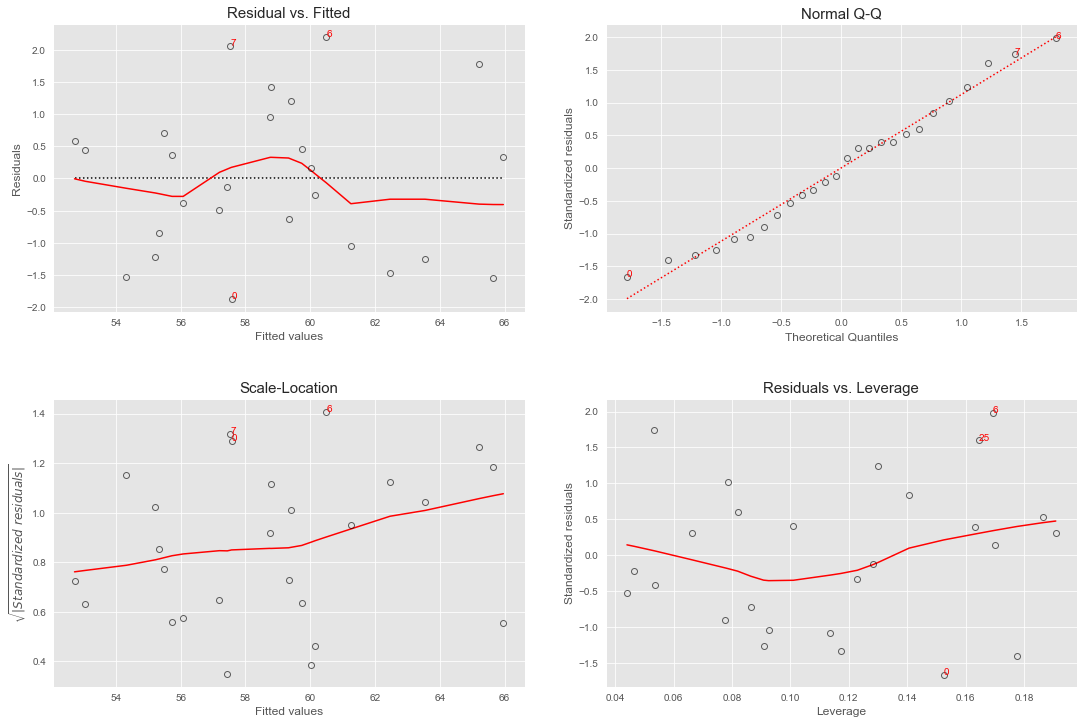

In [162]:
plt.figure(figsize = (15,10))

lmdiag.plot(olsmodel3)

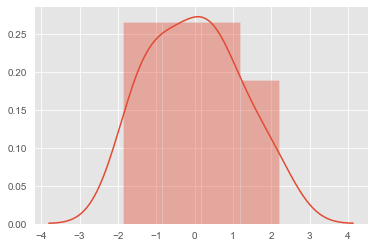

In [163]:
sns.distplot(olsmodel3.resid)

In [170]:
import statsmodels.api as sm

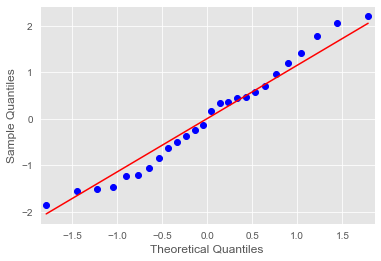

In [178]:
sm.graphics.qqplot(olsmodel3.resid, line='s')
plt.show();

In [172]:
from scipy.stats import shapiro

In [175]:
shapiro(olsmodel3.resid)

(0.9640491008758545, 0.4774274528026581)

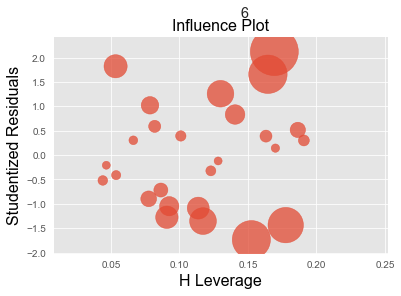

In [177]:
sm.graphics.influence_plot(olsmodel3)
plt.show();

In [192]:
data_cooks_d = olsmodel3.get_influence().summary_frame()

data_cooks_d[data_cooks_d.cooks_d > .1].sort_values('cooks_d')

,dfb_Intercept,dfb_USEnergy,dfb_USAutoFuelRate,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
23,0.549903,-0.454244,0.127741,0.142017,-1.404651,0.177588,-0.652726,-1.436785,-0.667658
0,-0.011831,-0.284691,0.573559,0.166022,-1.663659,0.152509,-0.705739,-1.734817,-0.735924
25,-0.567156,0.426725,-0.041307,0.168121,1.599970,0.164595,0.710185,1.659900,0.736786
6,-0.355959,0.671368,-0.843228,0.266052,1.979056,0.169287,0.893396,2.124919,0.959242


In [196]:
data.iloc[[0,25,6],:]

,WorldOil,USEnergy,USAutoFuelRate,USNuclear,USCoal,USDryGas
0,55.7,74.3,13.4,83.5,598.6,21.7
25,67.0,89.7,21.6,666.8,1109.8,18.9
6,62.7,78.9,14.6,255.2,781.1,19.7


## RMSE

In [197]:
from sklearn import metrics

In [198]:
X_final.head()

,USEnergy,USAutoFuelRate
0,74.3,13.4
1,72.5,13.6
2,70.5,14.0
3,74.4,13.8
4,76.3,14.1


In [199]:
np.sqrt(metrics.mean_squared_error(Y,olsmodel.predict(X)))

1.065366582869717

In [201]:
olsmodel.aic; olsmodel.bic

89.07738908516305

96.62596831329193

In [202]:
olsmodel1.aic; olsmodel1.bic

85.71535856177383

90.74774471385976

In [203]:
olsmodel2.aic; olsmodel2.bic

86.94271831736773

90.71700793143218

In [204]:
olsmodel3.aic; olsmodel3.bic

86.94271831736773

90.71700793143218